## Advance Regression Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

### Goals of the Case Study

- You are required to model the price of houses with the available independent variables. 
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
- The model will be a good way for management to understand the pricing dynamics of a new market.

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

####  And to determine the optimal value of lambda for ridge and lasso regression.

##  Data Set

We have a dataset on house prices in Australia and  probable factors affecting the price such as area , bedrooms,garage, pools, utilities and neighbourhood charactersitcs such as proximity to streets, market etc.


#### The structure of the Code below:
- Reading and understanding the data
- Data Visualisation
- Data engineering such as removing null values filling Nan values to make the data usable for model building
- Data finalisation 
- Data splitting for building the model
- Basic Linear Regression Model using RFE 
- Ridge and Lasso Regression models to regularize the model 
- Residual Analysis of the training data
- Subjective Questions

In [1]:
##Importing required libraries for building the model:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.20.3 | Pandas version: 1.3.4 | Seaborn version: 0.11.2'

### Importing and Loading of the Data 

In [2]:
house=pd.read_csv("train.csv")
house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [3]:
#Information about the whole dataset:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#All the Columns of the dataset 
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Shape of the dataset
house.shape

(1460, 81)

In [6]:
#Checking the null values of the columns:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#all is used to get summary of all the columns , otherwise default is to get the summary of numerical data types only.
house.describe(include="all")

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

### From the above data ,we can see the count of the number of entries in each column,i.e. only 91 values are there in Alley column and only 7 values are there in PoolQC and soo on...

In [8]:
#checking the number of unique entries in each column to understand whether it can be modified to categorical variable or not
house.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [9]:
#To look at the different variables under a single column:
print(house.LotShape.value_counts())
print(house.Alley.value_counts())
print(house.PoolQC.value_counts())
print(house.MiscFeature.value_counts())

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


### Data Preparation (Encoding Categorical Variables, Handling Null Values)


### Imputing Null Values

In [10]:
##To Check the NAn values in the data columns in descending manner:
house.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [11]:
## percentage of missing values (or) null values in the dataFrame
missing=pd.DataFrame(round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False), columns=['missing'])
missing

missing
PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
BsmtFullBath      0.00
HeatingQC         0.00
LowQualFinSF      0.00
LandSlope         0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LotConfig         0.00
YearBuilt         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
OverallCond       0.00
YearRemodAdd      0.00
2ndFlrSF          0.00
BsmtFinSF2        0.00
1stFlrSF          0.00
CentralAir        0.00
MSSubClass        0.00
Heating           0.00
TotalBsmtSF       0.00
BsmtUnfSF         0.00
BsmtFinSF1        0.00
RoofStyle         0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
SalePrice         0.00

In [12]:
## Treating the NaN Values
house['PoolQC'] = house['PoolQC'].fillna('No_Pool')
house['MiscFeature'] = house['MiscFeature'].fillna('None')
house['Alley'] = house['Alley'].fillna('No_Alley_Access')
house['Fence'] = house['Fence'].fillna('No_Fence')
house['FireplaceQu'] = house['FireplaceQu'].fillna('No_Fireplace')
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)
house['MasVnrType'] = house['MasVnrType'].fillna('None')
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)
house['Electrical'] = house['Electrical'].fillna("Other")

In [13]:
## Dropping the LotFontgage columns as it have more Null values
house.drop("LotFrontage",axis = 1, inplace=True)

In [14]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    house[col] = house[col].fillna('No_Basement')

In [15]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house[col] = house[col].fillna('No_Garage')


In [16]:
##Rechecking the info of the dataset after the modifications:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
house.shape

(1460, 80)

## Data Visualisation:

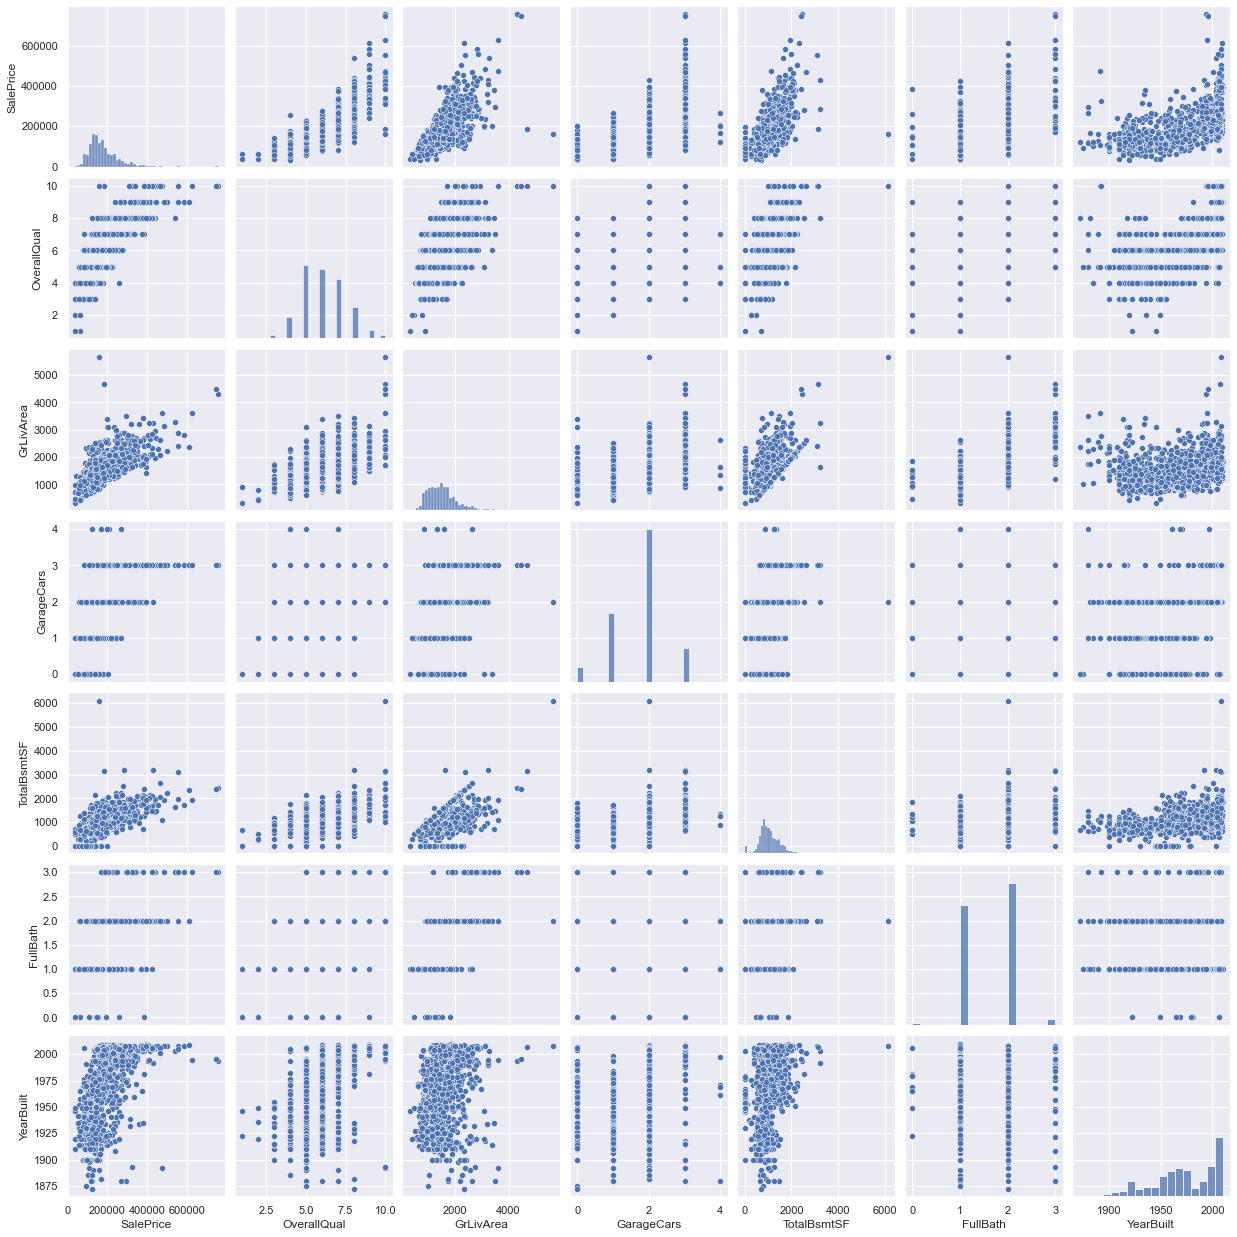

In [18]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show()

Find co-relation using heatmap

We will plot a heatmap to get co-relation between target and independent variables and among themselves.

<AxesSubplot:>

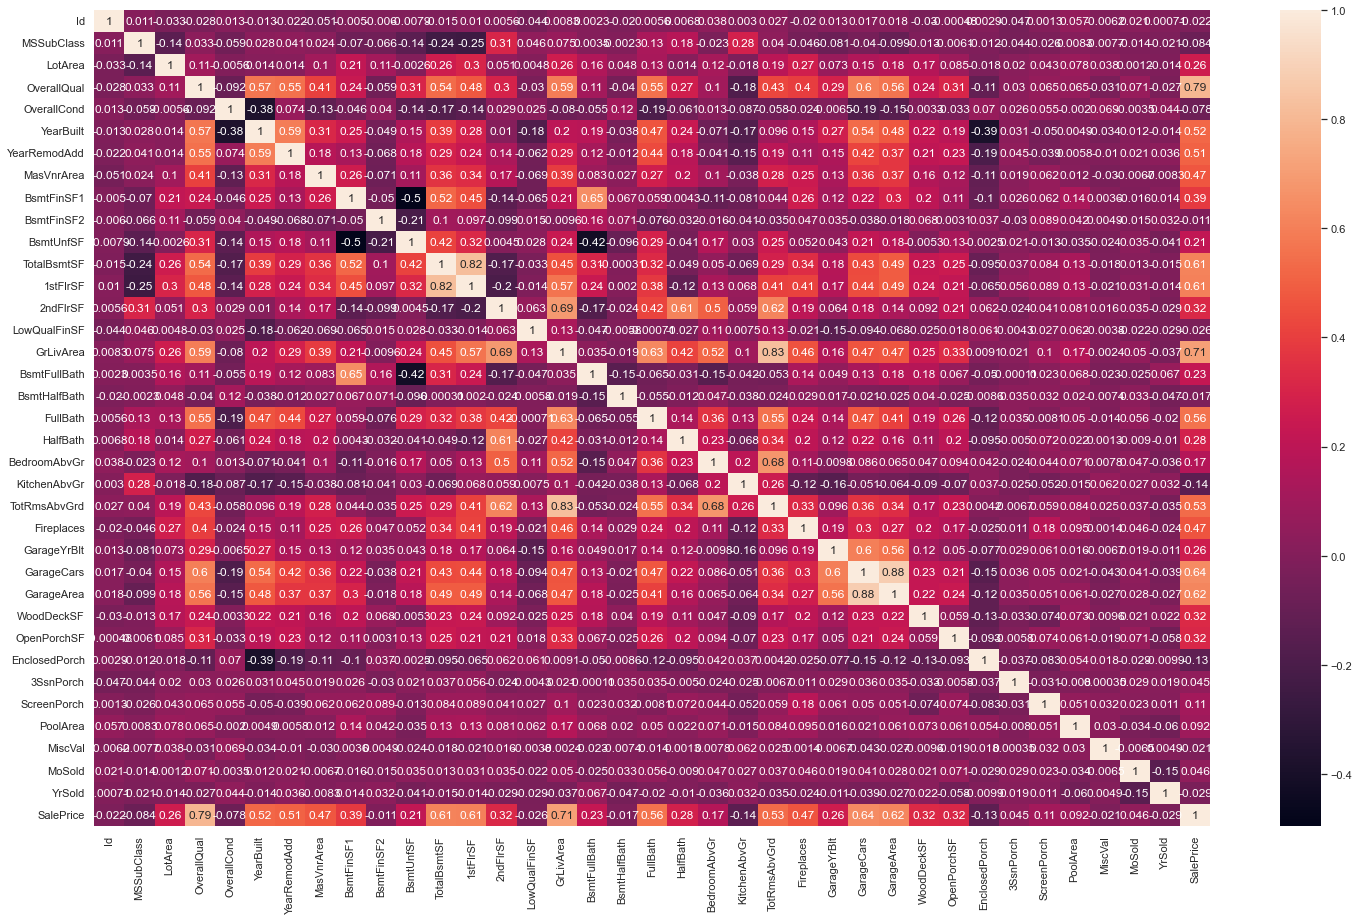

In [19]:
plt.figure(figsize=(25,15))
sns.heatmap(house.corr(),annot=True)

**Observations:**


0. As we can see that the dark block representhigh correlation, we can infer that the variables such as DiffYearbuilt,GarageYrBlt,YearBuilt , YearRemodAdd etc are highly correlated.

1. Target variable 'SalePrice' is moderately co-related with independent variables such as 'LotFrontage', 'LotArea',
'MasVnrArea', 'BsMtHalfBath', 'HalfBath', 'FirePlaces', 'GarageCars', 'WoodDescSF', 'OpenPorchSF'.

2. The house prices for certain zoning such 'FV' is high while it low for zoning such as 'RM' and and 'C'.

3. Target variable 'SalePrice' is highly postively co-related with independent variables such as 'BsnmtFinSMF1', 'TotalBsmtSF',
'1stFltSF', 'GrLivArea', 'TotalRmsGrd', '2ndFlrSF', 'Fullbath', 'TotalRmsAbvGrd', 'GarageArea'.


4.  All except lot shape 'Reg' fetch higher prices.

5.  All except lot shape 'Lvl' fetch higher prices.

6.  'LotConfig', 'LanSlope' , 'BldgType', "RoofStyle', "RoofMat",'Exterior', 'Foundation', 'BsmtExposure', 'BsmtFinType', 'Functional', 'Fence', 'MiscFeatures' do not have significant influence over prices.

7. Target variable 'SalePrice' is highly negatively co-related with independent variables such as 'AgeRemodel', 'AgeGrage',
'AgeHouse' and 'AgeRemodel'.


8. 'Condition' hase varied effect on the sale price.

9. 'OverallQual', 'OverAllCOnd' have very high influence on the sale price, 10 being highest.

10. 'Stone' type venner masonry has a positive influence over the prices.

11. 'Subclass', 'Neighborhood', 'HouseStyle',  of the house affect the prices in a complex way.

12. Good 'External' Appearance and 'External COndition', 'Basement Quality', 'Heating', 'KitchenQua', 'FirePlace', 'PoolQC', also drive the price up very much if they are of good quality.

13. Having 'Central Airconditing' and 'Builtin Garage' and 'Garage FInish' also drive prices up.

14. 'Alley' may have slight influence over the prices.

15. A 'new' sale type higher prices than other sale types inclduing the 'Partial Sale'.

16. There might be interrelated variables which may show multi-colinearity such as 'TotalRmsAbvGrd' and 'GrvArea', 

17. A 'Paved' house sells higher than 'Grave' one.


In [20]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(house["SalePrice"]))

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

In [21]:
#getting all the numerical variables including float and int datatypes:
numeric_data = house.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [22]:
# Numerical column analysis:
def dummy(col):
    sns.jointplot(data=house,x=col,y="SalePrice")

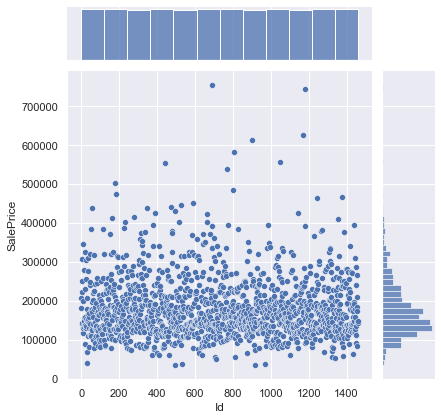

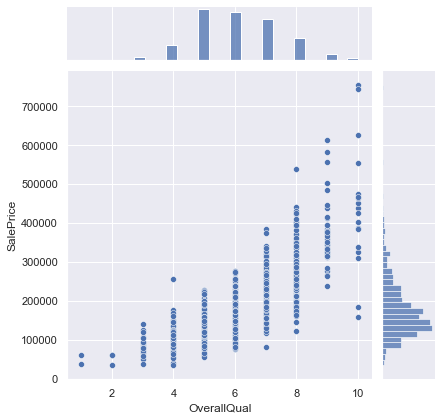

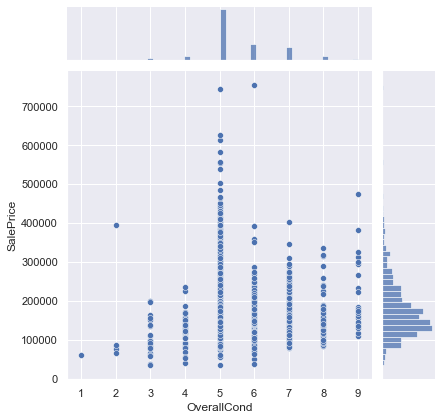

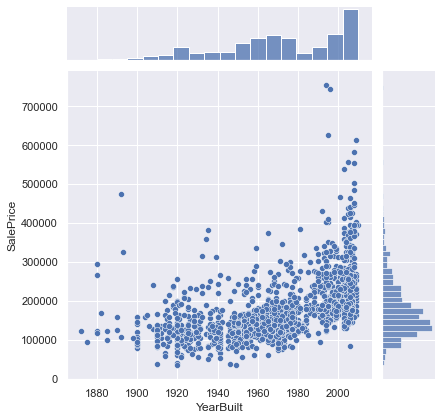

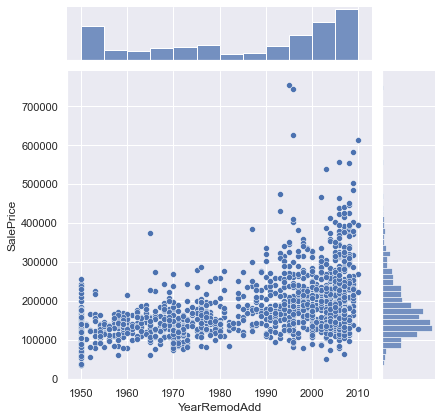

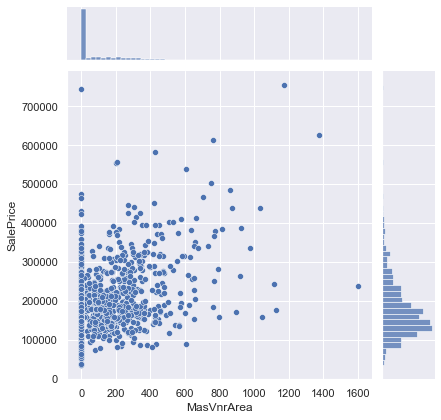

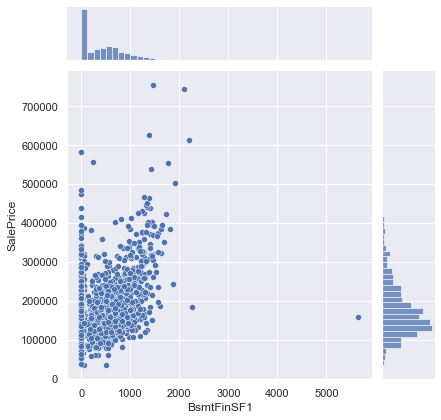

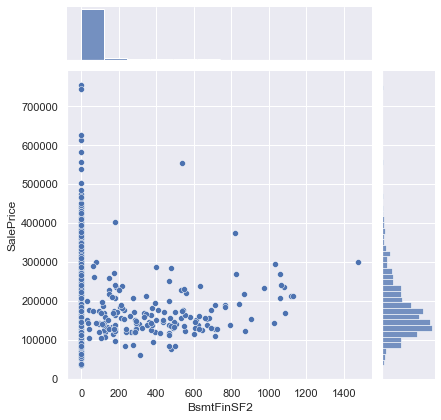

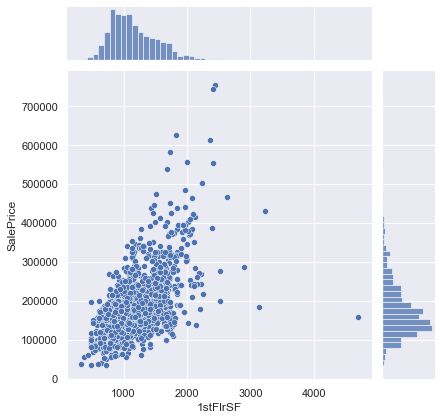

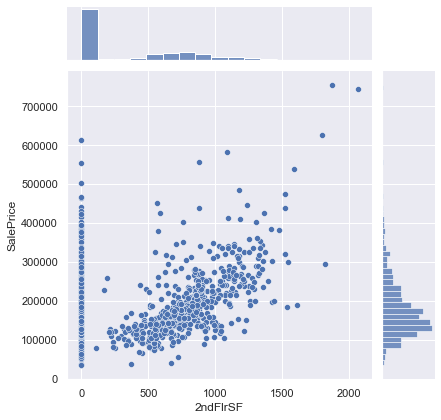

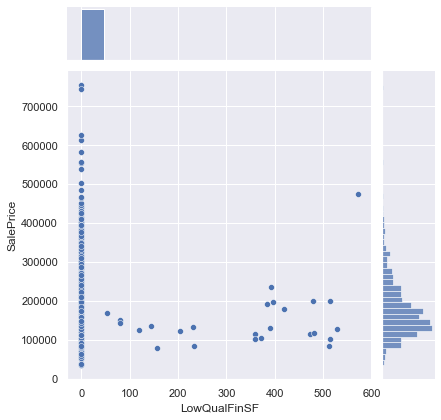

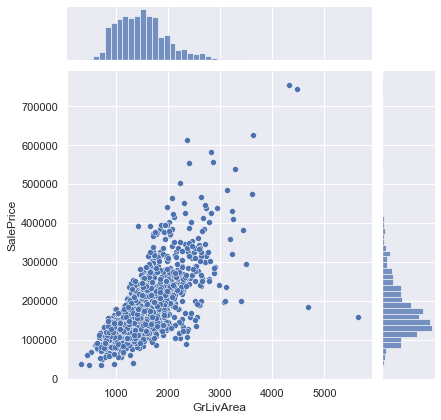

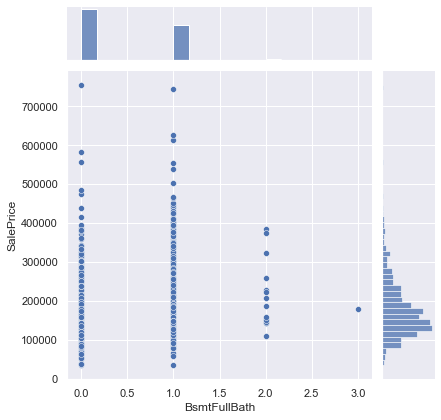

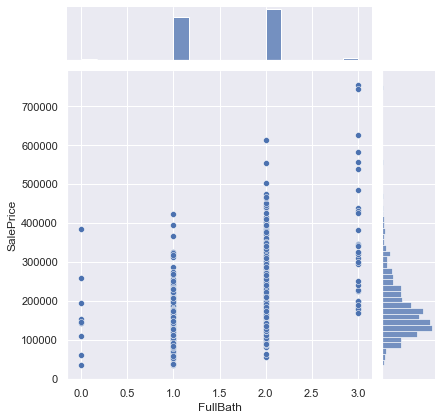

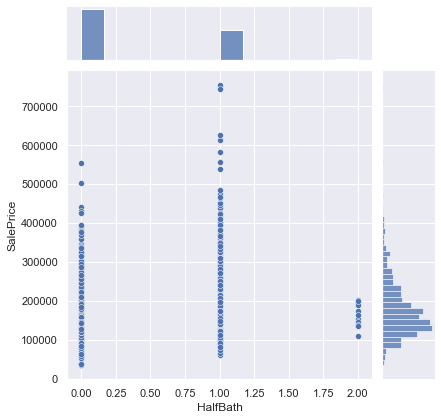

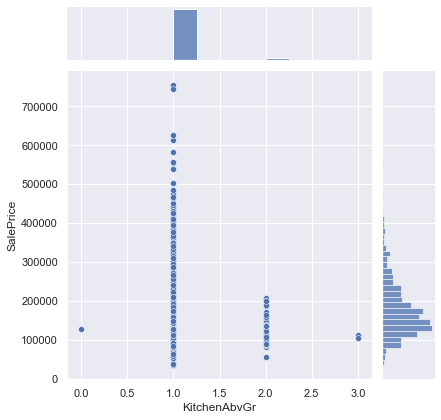

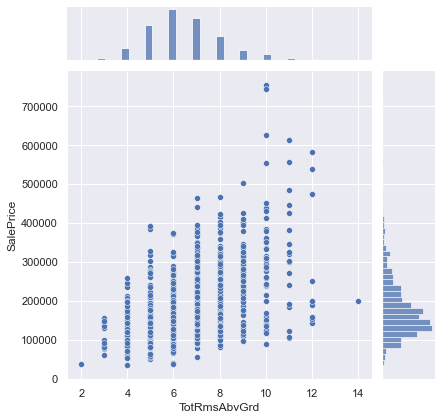

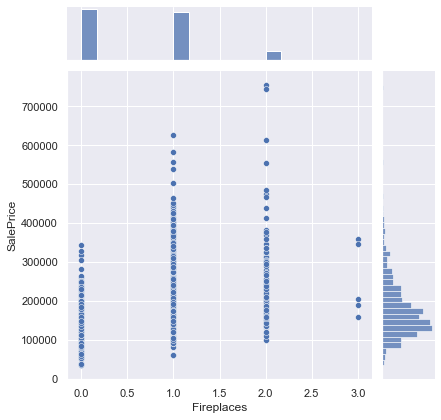

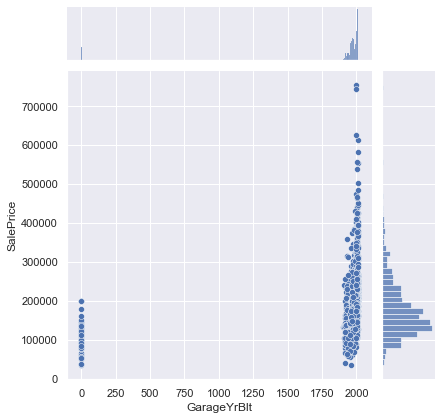

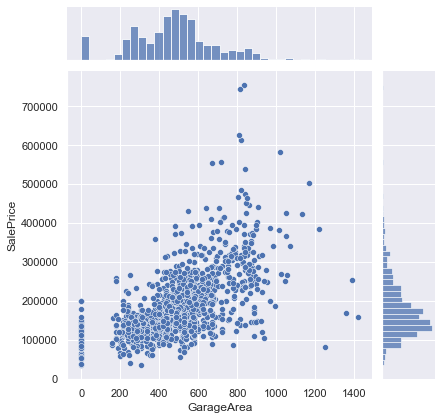

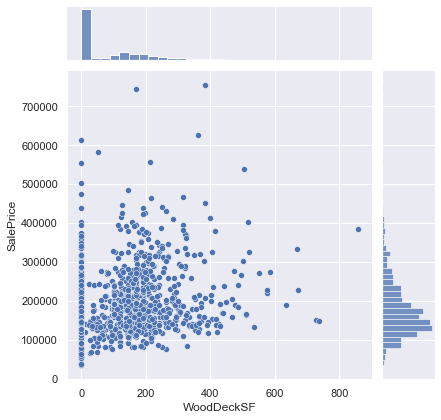

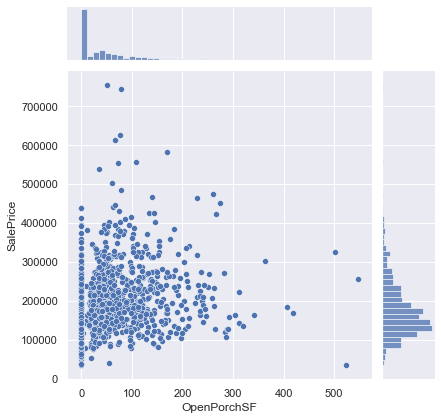

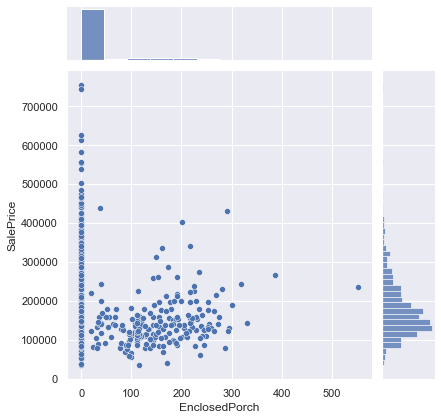

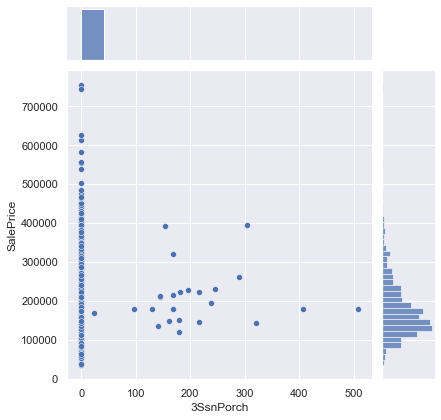

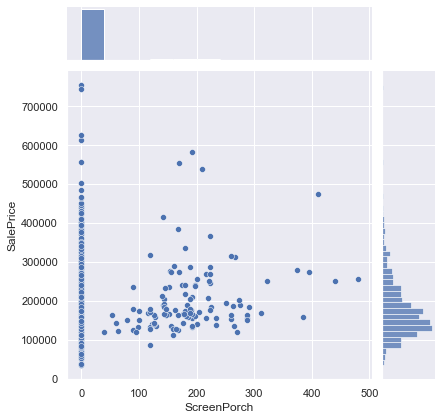

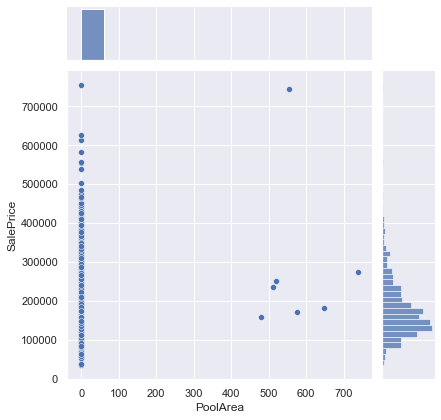

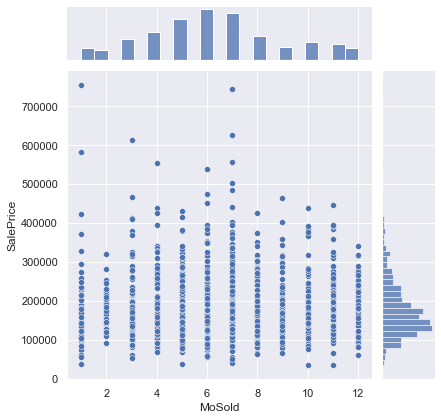

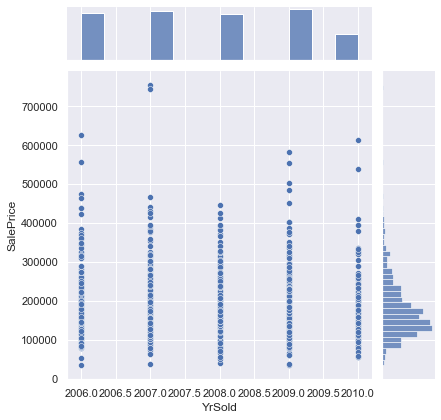

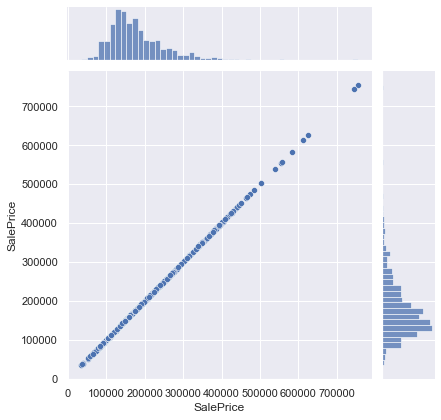

In [23]:
for i in numeric_data:
    dummy(i)

**Observations:**

1. Target variable **'SalePrice'** is **highly postively** co-related with independent variables such as **'YearBuilt', 'BsmtUnfSF', '2ndFlrSF', 'GarageArea','YearremodAdd'**

2. Target variable **'SalePrice'** is **moderately** co-related with independent variables such as **'LotArea',
'MasVnrArea', 'BsMtFinSF1', 'BsMtFinSF2', 'TotalBsmtSF', 'WoodDeckSF','EnclosedPorch','ScreenPorch','OpenPorchSF'**



In [24]:
#getting all the Categorical columns::

cat_values = house.select_dtypes(include=['object'])
cat_values.head()
out_col='SalePrice'

In [25]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = house[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = house[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=house[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

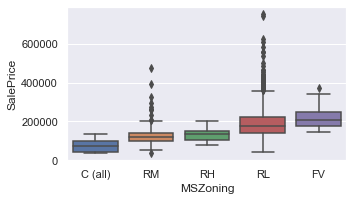

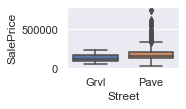

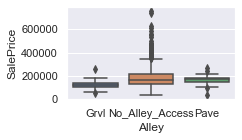

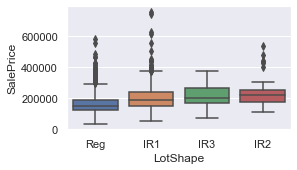

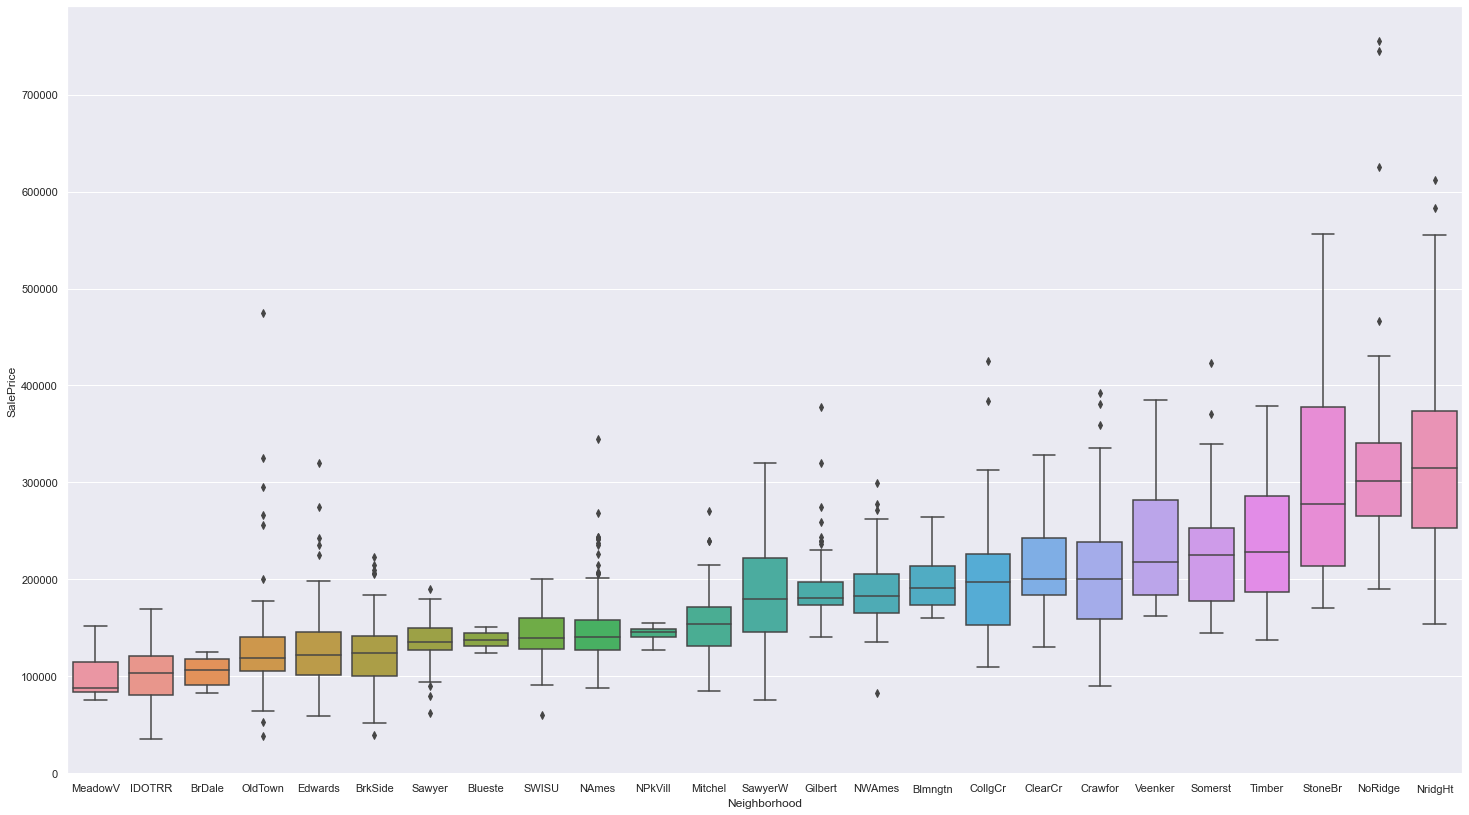

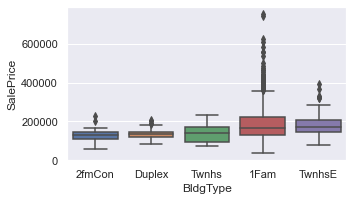

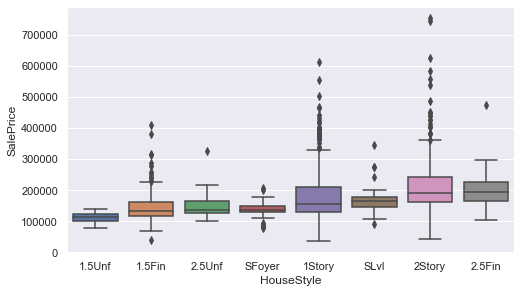

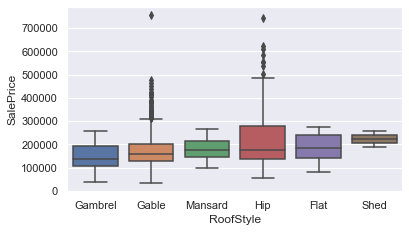

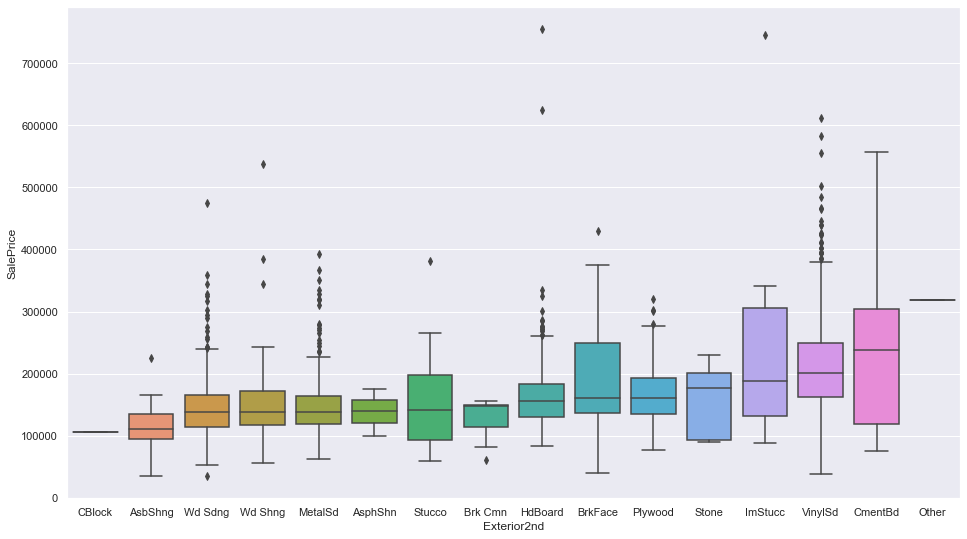

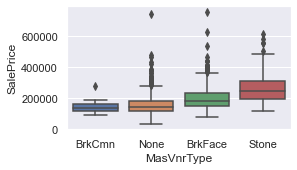

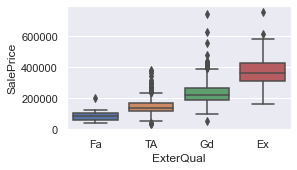

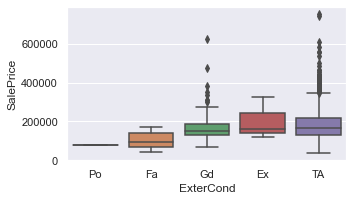

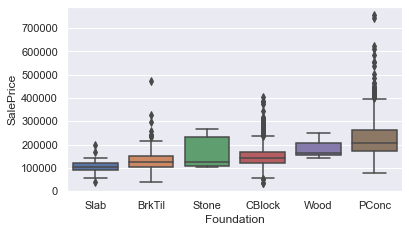

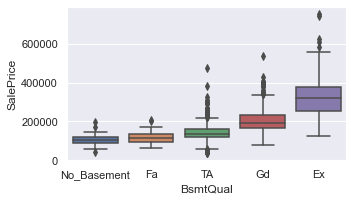

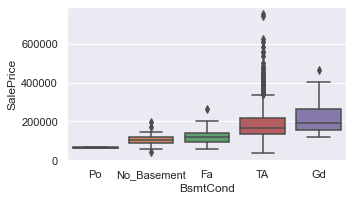

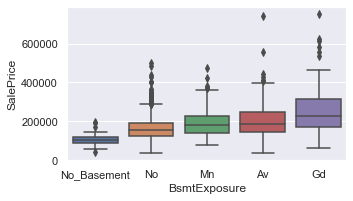

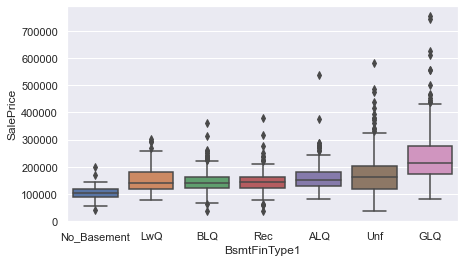

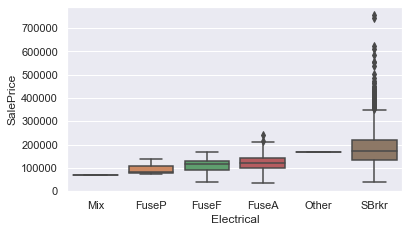

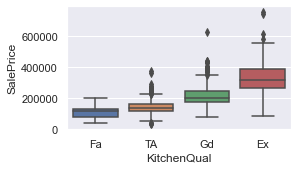

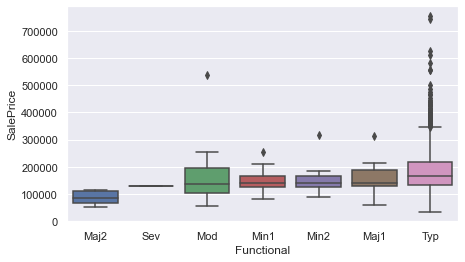

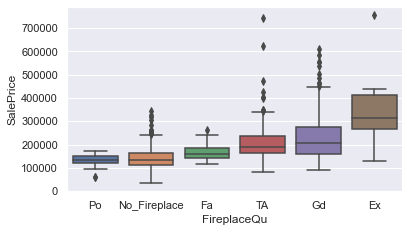

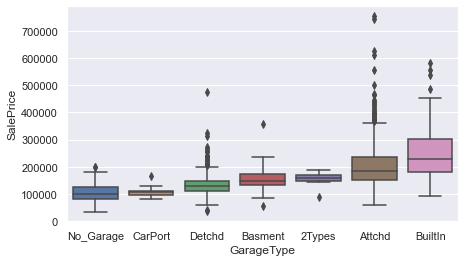

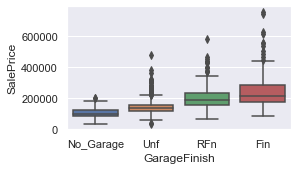

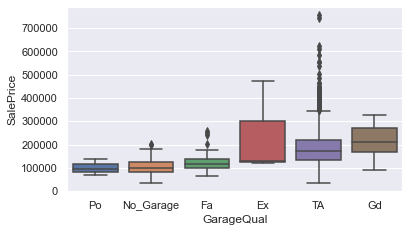

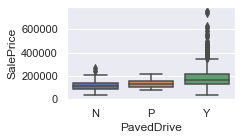

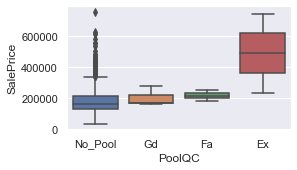

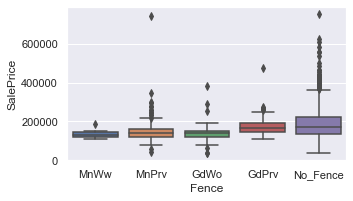

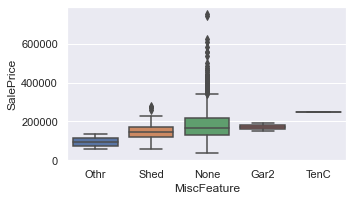

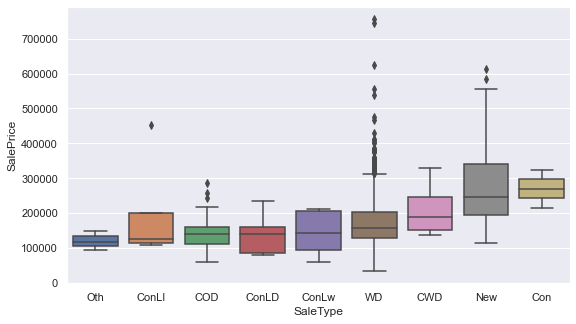

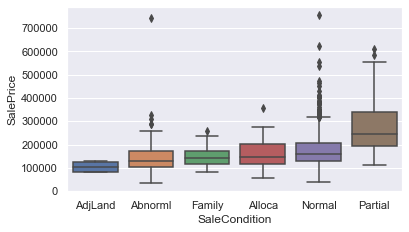

In [26]:
# Numerical column analysis:
for i, col in enumerate(cat_values):
    cat_col_analysis(i, col, out_col)

**Observations:**

1. The house prices for certain zoning FV is high followed by RL,RH,RM,C.

2. Price of 'Paved' house is higher than 'Gravel' pave.

3. 'Alley' is having minimum influence over the prices.

4. 'Subclass', 'Neighborhood', 'HouseStyle',  of the house affect the prices in a complex way.

5.  Reg in lotshape is having the least price and the highest is IR3.

6.  'LotConfig', 'LanSlope' , 'BldgType', "RoofStyle', "RoofMat",'Exterior', 'Foundation', 'BsmtExposure', 'BsmtFinType', 'Functional', 'Fence', 'MiscFeatures' do not have significant influence over prices.

7. 'Condition' hase varied effect on the sale price.

8. 'OverallQual', 'OverAllCOnd' have very high influence on the sale price, 10 being highest.

10. Good 'External' Appearance and 'External COndition', 'Basement Quality', 'Heating', 'KitchenQua', 'FirePlace', 'PoolQC', also drive the price up very much if they are of good quality.

11. Having 'Central Airconditing' and 'Builtin Garage' and 'Garage FInish' also increases the sale price of the houses.

12. A 'new' sale type higher prices than other sale types inclduing the 'Partial Sale'.


## Creating Dummy Variables:
- Initially converting all the binary variables to numeric types and then creating dummy values:

In [27]:
#Converting a Binary variable into numeric datatypes
# mapping it to 0 and 1
house['Street'] = house['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

house['CentralAir'] = house['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
house['PavedDrive'] = house['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

In [28]:
#To confirm the above modification:
house.Street.value_counts()

1    1454
0       6
Name: Street, dtype: int64

In [29]:
# convert into dummies:
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No_Alley_Access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0                      1           0             0             0   
1                      1           0             0             0   
2                      1           0             0             0   
3                      1           0             0             0   
4                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0

In [30]:
## Droping the 'Id' column as it won't give any meaningful insight:
df = house.drop(['Id'],axis=1)

In [31]:
# Droping the original categorical column as we have created the dummies for them:
df = df.drop(list(cat_values.columns), axis=1)

In [32]:
# Adding the dummy categorical column to original dataset:
df = pd.concat([df,data_dummies], axis=1)

In [33]:
df.shape

(1460, 260)

## 10. Creation of Training  and Test Sets 

We will split the data in to training and test set, with training set being 70% of whole data and rest 30% being test set.

In [34]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [35]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [36]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

## 9. Rescaling the Features 

We will all bring them to same scale using **Scaling**, as it

1. Helps in faster convergence to minima during training.


2. It makes evaluation of the model easier.


3. It is necessary before using Ridge or Lasso

4. Scaled both the train and test datasets, but perfomed fitting and transform on train data but done transform only on test data.

In [37]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## Model building:

In [38]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [39]:
# Calculating the RFE
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 116),
 ('LotArea', False, 79),
 ('OverallQual', True, 1),
 ('OverallCond', False, 59),
 ('YearBuilt', False, 52),
 ('YearRemodAdd', False, 80),
 ('MasVnrArea', False, 232),
 ('BsmtFinSF1', False, 20),
 ('BsmtFinSF2', False, 28),
 ('BsmtUnfSF', False, 30),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 15),
 ('2ndFlrSF', False, 13),
 ('LowQualFinSF', False, 32),
 ('GrLivArea', False, 23),
 ('BsmtFullBath', False, 147),
 ('BsmtHalfBath', False, 234),
 ('FullBath', False, 208),
 ('HalfBath', False, 237),
 ('BedroomAbvGr', False, 172),
 ('KitchenAbvGr', False, 144),
 ('TotRmsAbvGrd', False, 209),
 ('Fireplaces', False, 211),
 ('GarageYrBlt', False, 121),
 ('GarageCars', False, 146),
 ('GarageArea', False, 84),
 ('WoodDeckSF', False, 156),
 ('OpenPorchSF', False, 205),
 ('EnclosedPorch', False, 191),
 ('3SsnPorch', False, 203),
 ('ScreenPorch', False, 189),
 ('PoolArea', False, 159),
 ('MiscVal', False, 217),
 ('MoSold', False, 236),
 ('YrSold', False, 206),
 ('MSZon

In [41]:
#to see only the top columns with rank 1
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'TotalBsmtSF', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Condition2_PosN',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Foundation_Stone', 'BsmtQual_No_Basement', 'BsmtCond_No_Basement',
       'BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'CentralAir_Y',
       'Functional_Sev', 'PoolQC_Gd', 'SaleType_ConLD'],
      dtype='object')

In [42]:
#Columns that RFE did not select, just given a negation.
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=239)

In [43]:
# get our final training dataset
X_train_rfe = X_train[col]

In [44]:
X_train_rfe.columns

Index(['OverallQual', 'TotalBsmtSF', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Condition2_PosN',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Foundation_Stone', 'BsmtQual_No_Basement', 'BsmtCond_No_Basement',
       'BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'CentralAir_Y',
       'Functional_Sev', 'PoolQC_Gd', 'SaleType_ConLD'],
      dtype='object')

In [45]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

### Building model using statsmodel, for the detailed statistics

In [46]:
X_train_rfe=X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

#create first model
lr=sm.OLS(y_train,X_train_rfe)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     214.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:18   Log-Likelihood:                 302.46
No. Observations:                1021   AIC:                            -566.9
Df Residuals:                    1002   BIC:                            -473.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4859      0.071    161.862      0.000      11.347      11.625
OverallQual                  0.2414      0.007     33.778      0.000       0.227       0.255
TotalBsmtSF                  0.1329      0.008     15.852      0.000       0.116       0.149
MSZoning_FV                  0.4162      0.077      5.384      0.000       0.264       0.568
MSZoning_RH                  0.3712      0.087      4.284      0.000       0.201       0.541
MSZoning_RL                  0.4027      0.072      5.600      0.000       0.262       0.544
MSZoning_RM                  0.2655      0.072      3.666      0.000       0.123       0.408
Neighborhood_BrDale         -0.1983      0.055     -3.599      0.000      -0.306      -0.090
Condition2_PosN             -1.2046      0.185     -6.528      0.000      -1.567      -0.842
RoofMatl_Tar&Grv             0.2551      0.086      2.968      0.003       0.086       0.424
RoofMatl_WdShngl             0.1541      0.092      1.681      0.093      -0.026       0.334
Exterior1st_BrkComm         -0.5667      0.136     -4.152      0.000      -0.834      -0.299
Foundation_Stone             0.2356      0.106      2.216      0.027       0.027       0.444
BsmtQual_No_Basement         0.2224      0.064      3.474      0.001       0.097       0.348
BsmtCond_No_Basement         0.2224      0.064      3.474      0.001       0.097       0.348
BsmtFinType1_No_Basement     0.2224      0.064      3.474      0.001       0.097       0.348
BsmtFinType2_No_Basement    -0.4492      0.185     -2.429      0.015      -0.812      -0.086
CentralAir_Y                 0.1670      0.025      6.790      0.000       0.119       0.215
Functional_Sev              -0.5155      0.201     -2.566      0.010      -0.910      -0.121
PoolQC_Gd                   -2.2092      0.200    -11.053      0.000      -2.601      -1.817
SaleType_ConLD               0.1509      0.083      1.811      0.070      -0.013       0.314
==============================================================================
Omnibus:                        7.315   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                8.942
Skew:                           0.092   Prob(JB):                       0.0114
Kurtosis:                       3.420   Cond. No.                     1.14e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
r2train = r2_score(y_train, y_pred_train)
r2test = r2_score(y_test, y_pred_test)
print(r2train)
print(r2test)

0.9589277204631851
-1.6433567239815436e+19


We can see that the r2 score of the training data is **0.95** whereas the r2score of test data is **-1.64** which is clear that the model is overfitted, to reduce this amount of overfitting, we should do regularization.before that, let us continue with the VIF and P-value Method to find the best significant variable

**"First model" calc, We have to remove the feature RoofMatl_WdShngl as the P-value is more than 0.05 which is insiginificant, after that we will calculate the r and adj-r values again.**

**Now, we chech the values of VIF to check if there are any variables with high collinearity.this is an extremely important parameter to test our linear  model. the formula for calculating VIF is, VIF=1/(1-R^2)**

________
### From the above model, we can notice that the smallest eigen values is 2.01e-33. . This might indicate that there are strong multicollinearity problems or that the design matrix is singular.Hence we do VIF which means Variance inflation factor :

### **Now, we check the values of VIF to check if there are any variables with high collinearity.this is an extremely important parameter to test our linear  model. the formula for calculating VIF is, VIF=1/(1-R^2)**

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
13      BsmtQual_No_Basement     inf
15  BsmtFinType1_No_Basement     inf
14      BsmtCond_No_Basement     inf
0                      const  155.85
16  BsmtFinType2_No_Basement   30.19
5                MSZoning_RL   26.96
6                MSZoning_RM   20.79
3                MSZoning_FV    7.79
4                MSZoning_RH    2.92
2                TotalBsmtSF    2.18
1                OverallQual    1.58
9           RoofMatl_Tar&Grv    1.34
17              CentralAir_Y    1.26
18            Functional_Sev    1.22
19                 PoolQC_Gd    1.21
11       Exterior1st_BrkComm    1.13
7        Neighborhood_BrDale    1.09
20            SaleType_ConLD    1.05
8            Condition2_PosN    1.03
12          Foundation_Stone    1.02
10          RoofMatl_WdShngl    1.01

**From the abovevalues of VIF, we found that the values of features are reaching towards infinity which means that there is very high correlation, hence we have to remove that features to handle the problem of multi-collinearity...**

### Before moving to the further model, we should remember the following points while removing features:
- High P-value, High VIF --> we should drop that feature first.
- High P, Low VIF-->second priority to remove the feature.
- Low P, High VIF--> Third priority to remove the feature.
- Low P,Low VIF-->We should keep that variable.

- We should remove only one variable at a time .

### Model 2:

In [49]:
X_train_new=X_train_rfe.drop(['RoofMatl_WdShngl'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     226.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:18   Log-Likelihood:                 301.02
No. Observations:                1021   AIC:                            -566.0
Df Residuals:                    1003   BIC:                            -477.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4874      0.071    161.749      0.000      11.348      11.627
OverallQual                  0.2419      0.007     33.836      0.000       0.228       0.256
TotalBsmtSF                  0.1340      0.008     16.012      0.000       0.118       0.150
MSZoning_FV                  0.4148      0.077      5.360      0.000       0.263       0.567
MSZoning_RH                  0.3704      0.087      4.271      0.000       0.200       0.541
MSZoning_RL                  0.4019      0.072      5.585      0.000       0.261       0.543
MSZoning_RM                  0.2649      0.072      3.655      0.000       0.123       0.407
Neighborhood_BrDale         -0.1978      0.055     -3.585      0.000      -0.306      -0.090
Condition2_PosN             -1.2113      0.185     -6.560      0.000      -1.574      -0.849
RoofMatl_Tar&Grv             0.2546      0.086      2.960      0.003       0.086       0.423
Exterior1st_BrkComm         -0.5667      0.137     -4.148      0.000      -0.835      -0.299
Foundation_Stone             0.2354      0.106      2.213      0.027       0.027       0.444
BsmtQual_No_Basement         0.2252      0.064      3.517      0.000       0.100       0.351
BsmtCond_No_Basement         0.2252      0.064      3.517      0.000       0.100       0.351
BsmtFinType1_No_Basement     0.2252      0.064      3.517      0.000       0.100       0.351
BsmtFinType2_No_Basement    -0.4554      0.185     -2.461      0.014      -0.819      -0.092
CentralAir_Y                 0.1668      0.025      6.774      0.000       0.118       0.215
Functional_Sev              -0.5155      0.201     -2.564      0.011      -0.910      -0.121
PoolQC_Gd                   -2.2228      0.200    -11.121      0.000      -2.615      -1.831
SaleType_ConLD               0.1506      0.083      1.806      0.071      -0.013       0.314
==============================================================================
Omnibus:                        7.219   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.763
Skew:                           0.094   Prob(JB):                       0.0125
Kurtosis:                       3.413   Cond. No.                     8.21e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.91e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12      BsmtQual_No_Basement     inf
13      BsmtCond_No_Basement     inf
14  BsmtFinType1_No_Basement     inf
0                      const  155.82
15  BsmtFinType2_No_Basement   30.18
5                MSZoning_RL   26.96
6                MSZoning_RM   20.79
3                MSZoning_FV    7.79
4                MSZoning_RH    2.92
2                TotalBsmtSF    2.16
1                OverallQual    1.58
9           RoofMatl_Tar&Grv    1.34
16              CentralAir_Y    1.26
17            Functional_Sev    1.22
18                 PoolQC_Gd    1.21
10       Exterior1st_BrkComm    1.13
7        Neighborhood_BrDale    1.09
19            SaleType_ConLD    1.05
8            Condition2_PosN    1.03
11          Foundation_Stone    1.02

**All the variable are not significant , but the VIF is also very high, hence as per the hierarchy of dropping the variables, dropping feature 'SaleType_ConLD' as theP-value is very high which means it isn't significant.**

In [51]:
X_train_new=X_train_rfe.drop(['SaleType_ConLD'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     240.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:18   Log-Likelihood:                 299.37
No. Observations:                1021   AIC:                            -564.7
Df Residuals:                    1004   BIC:                            -480.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5104      0.070    164.564      0.000      11.373      11.648
OverallQual                  0.2421      0.007     33.830      0.000       0.228       0.256
TotalBsmtSF                  0.1337      0.008     15.963      0.000       0.117       0.150
MSZoning_FV                  0.3964      0.077      5.162      0.000       0.246       0.547
MSZoning_RH                  0.3505      0.086      4.070      0.000       0.182       0.520
MSZoning_RL                  0.3843      0.071      5.383      0.000       0.244       0.524
MSZoning_RM                  0.2457      0.072      3.423      0.001       0.105       0.387
Neighborhood_BrDale         -0.1970      0.055     -3.567      0.000      -0.305      -0.089
Condition2_PosN             -1.2111      0.185     -6.551      0.000      -1.574      -0.848
RoofMatl_Tar&Grv             0.2534      0.086      2.943      0.003       0.084       0.422
Exterior1st_BrkComm         -0.5703      0.137     -4.171      0.000      -0.839      -0.302
Foundation_Stone             0.2326      0.106      2.184      0.029       0.024       0.442
BsmtQual_No_Basement         0.2260      0.064      3.524      0.000       0.100       0.352
BsmtCond_No_Basement         0.2260      0.064      3.524      0.000       0.100       0.352
BsmtFinType1_No_Basement     0.2260      0.064      3.524      0.000       0.100       0.352
BsmtFinType2_No_Basement    -0.4549      0.185     -2.455      0.014      -0.818      -0.091
CentralAir_Y                 0.1619      0.025      6.609      0.000       0.114       0.210
Functional_Sev              -0.5148      0.201     -2.557      0.011      -0.910      -0.120
PoolQC_Gd                   -2.2208      0.200    -11.098      0.000      -2.613      -1.828
==============================================================================
Omnibus:                        7.303   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                9.000
Skew:                           0.088   Prob(JB):                       0.0111
Kurtosis:                       3.425   Cond. No.                     4.06e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12      BsmtQual_No_Basement     inf
14  BsmtFinType1_No_Basement     inf
13      BsmtCond_No_Basement     inf
0                      const  150.80
15  BsmtFinType2_No_Basement   30.18
5                MSZoning_RL   26.46
6                MSZoning_RM   20.34
3                MSZoning_FV    7.66
4                MSZoning_RH    2.87
2                TotalBsmtSF    2.16
1                OverallQual    1.58
9           RoofMatl_Tar&Grv    1.34
16              CentralAir_Y    1.24
17            Functional_Sev    1.22
18                 PoolQC_Gd    1.21
10       Exterior1st_BrkComm    1.13
7        Neighborhood_BrDale    1.09
8            Condition2_PosN    1.03
11          Foundation_Stone    1.02

**All the variable are significant, but the VIF is very high, hence dropping the feature 'BsmtQual_No_Basement'.**

In [53]:
X_train_new=X_train_rfe.drop(['BsmtQual_No_Basement'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     240.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:18   Log-Likelihood:                 299.37
No. Observations:                1021   AIC:                            -564.7
Df Residuals:                    1004   BIC:                            -480.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5104      0.070    164.564      0.000      11.373      11.648
OverallQual                  0.2421      0.007     33.830      0.000       0.228       0.256
TotalBsmtSF                  0.1337      0.008     15.963      0.000       0.117       0.150
MSZoning_FV                  0.3964      0.077      5.162      0.000       0.246       0.547
MSZoning_RH                  0.3505      0.086      4.070      0.000       0.182       0.520
MSZoning_RL                  0.3843      0.071      5.383      0.000       0.244       0.524
MSZoning_RM                  0.2457      0.072      3.423      0.001       0.105       0.387
Neighborhood_BrDale         -0.1970      0.055     -3.567      0.000      -0.305      -0.089
Condition2_PosN             -1.2111      0.185     -6.551      0.000      -1.574      -0.848
RoofMatl_Tar&Grv             0.2534      0.086      2.943      0.003       0.084       0.422
Exterior1st_BrkComm         -0.5703      0.137     -4.171      0.000      -0.839      -0.302
Foundation_Stone             0.2326      0.106      2.184      0.029       0.024       0.442
BsmtCond_No_Basement         0.3390      0.096      3.524      0.000       0.150       0.528
BsmtFinType1_No_Basement     0.3390      0.096      3.524      0.000       0.150       0.528
BsmtFinType2_No_Basement    -0.4549      0.185     -2.455      0.014      -0.818      -0.091
CentralAir_Y                 0.1619      0.025      6.609      0.000       0.114       0.210
Functional_Sev              -0.5148      0.201     -2.557      0.011      -0.910      -0.120
PoolQC_Gd                   -2.2208      0.200    -11.098      0.000      -2.613      -1.828
==============================================================================
Omnibus:                        7.303   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                9.000
Skew:                           0.088   Prob(JB):                       0.0111
Kurtosis:                       3.425   Cond. No.                     6.97e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.43e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12      BsmtCond_No_Basement     inf
13  BsmtFinType1_No_Basement     inf
0                      const  150.80
14  BsmtFinType2_No_Basement   30.18
5                MSZoning_RL   26.46
6                MSZoning_RM   20.34
3                MSZoning_FV    7.66
4                MSZoning_RH    2.87
2                TotalBsmtSF    2.16
1                OverallQual    1.58
9           RoofMatl_Tar&Grv    1.34
15              CentralAir_Y    1.24
16            Functional_Sev    1.22
17                 PoolQC_Gd    1.21
10       Exterior1st_BrkComm    1.13
7        Neighborhood_BrDale    1.09
8            Condition2_PosN    1.03
11          Foundation_Stone    1.02

**All the variable are significant, but the VIF is very high, hence dropping the feature 'BsmtCond_No_Basement'.**

In [55]:
X_train_new=X_train_rfe.drop(['BsmtCond_No_Basement'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     240.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:18   Log-Likelihood:                 299.37
No. Observations:                1021   AIC:                            -564.7
Df Residuals:                    1004   BIC:                            -480.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5104      0.070    164.564      0.000      11.373      11.648
OverallQual                  0.2421      0.007     33.830      0.000       0.228       0.256
TotalBsmtSF                  0.1337      0.008     15.963      0.000       0.117       0.150
MSZoning_FV                  0.3964      0.077      5.162      0.000       0.246       0.547
MSZoning_RH                  0.3505      0.086      4.070      0.000       0.182       0.520
MSZoning_RL                  0.3843      0.071      5.383      0.000       0.244       0.524
MSZoning_RM                  0.2457      0.072      3.423      0.001       0.105       0.387
Neighborhood_BrDale         -0.1970      0.055     -3.567      0.000      -0.305      -0.089
Condition2_PosN             -1.2111      0.185     -6.551      0.000      -1.574      -0.848
RoofMatl_Tar&Grv             0.2534      0.086      2.943      0.003       0.084       0.422
Exterior1st_BrkComm         -0.5703      0.137     -4.171      0.000      -0.839      -0.302
Foundation_Stone             0.2326      0.106      2.184      0.029       0.024       0.442
BsmtFinType1_No_Basement     0.6779      0.192      3.524      0.000       0.300       1.055
BsmtFinType2_No_Basement    -0.4549      0.185     -2.455      0.014      -0.818      -0.091
CentralAir_Y                 0.1619      0.025      6.609      0.000       0.114       0.210
Functional_Sev              -0.5148      0.201     -2.557      0.011      -0.910      -0.120
PoolQC_Gd                   -2.2208      0.200    -11.098      0.000      -2.613      -1.828
==============================================================================
Omnibus:                        7.303   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                9.000
Skew:                           0.088   Prob(JB):                       0.0111
Kurtosis:                       3.425   Cond. No.                         75.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                      const  150.80
12  BsmtFinType1_No_Basement   31.47
13  BsmtFinType2_No_Basement   30.18
5                MSZoning_RL   26.46
6                MSZoning_RM   20.34
3                MSZoning_FV    7.66
4                MSZoning_RH    2.87
2                TotalBsmtSF    2.16
1                OverallQual    1.58
9           RoofMatl_Tar&Grv    1.34
14              CentralAir_Y    1.24
15            Functional_Sev    1.22
16                 PoolQC_Gd    1.21
10       Exterior1st_BrkComm    1.13
7        Neighborhood_BrDale    1.09
8            Condition2_PosN    1.03
11          Foundation_Stone    1.02

**All the variable are significant, but the VIF is very high, hence dropping the feature 'const'.**

In [57]:
X_train_new=X_train_rfe.drop(['const'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     240.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:18   Log-Likelihood:                 299.37
No. Observations:                1021   AIC:                            -564.7
Df Residuals:                    1004   BIC:                            -480.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5104      0.070    164.564      0.000      11.373      11.648
OverallQual                  0.2421      0.007     33.830      0.000       0.228       0.256
TotalBsmtSF                  0.1337      0.008     15.963      0.000       0.117       0.150
MSZoning_FV                  0.3964      0.077      5.162      0.000       0.246       0.547
MSZoning_RH                  0.3505      0.086      4.070      0.000       0.182       0.520
MSZoning_RL                  0.3843      0.071      5.383      0.000       0.244       0.524
MSZoning_RM                  0.2457      0.072      3.423      0.001       0.105       0.387
Neighborhood_BrDale         -0.1970      0.055     -3.567      0.000      -0.305      -0.089
Condition2_PosN             -1.2111      0.185     -6.551      0.000      -1.574      -0.848
RoofMatl_Tar&Grv             0.2534      0.086      2.943      0.003       0.084       0.422
Exterior1st_BrkComm         -0.5703      0.137     -4.171      0.000      -0.839      -0.302
Foundation_Stone             0.2326      0.106      2.184      0.029       0.024       0.442
BsmtFinType1_No_Basement     0.6779      0.192      3.524      0.000       0.300       1.055
BsmtFinType2_No_Basement    -0.4549      0.185     -2.455      0.014      -0.818      -0.091
CentralAir_Y                 0.1619      0.025      6.609      0.000       0.114       0.210
Functional_Sev              -0.5148      0.201     -2.557      0.011      -0.910      -0.120
PoolQC_Gd                   -2.2208      0.200    -11.098      0.000      -2.613      -1.828
==============================================================================
Omnibus:                        7.303   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                9.000
Skew:                           0.088   Prob(JB):                       0.0111
Kurtosis:                       3.425   Cond. No.                         75.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11  BsmtFinType1_No_Basement  32.39
12  BsmtFinType2_No_Basement  31.09
13              CentralAir_Y  16.90
4                MSZoning_RL  14.39
5                MSZoning_RM   3.03
1                TotalBsmtSF   2.16
2                MSZoning_FV   1.80
0                OverallQual   1.55
8           RoofMatl_Tar&Grv   1.34
14            Functional_Sev   1.22
15                 PoolQC_Gd   1.21
3                MSZoning_RH   1.13
9        Exterior1st_BrkComm   1.13
6        Neighborhood_BrDale   1.10
7            Condition2_PosN   1.03
10          Foundation_Stone   1.03

**All the variable are significant, but the VIF is very high, hence dropping the feature 'BsmtFinType1_No_Basement'.**

In [59]:
X_train_new=X_train_rfe.drop(['BsmtFinType1_No_Basement'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:18   Log-Likelihood:                 293.09
No. Observations:                1021   AIC:                            -554.2
Df Residuals:                    1005   BIC:                            -475.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5086      0.070    163.616      0.000      11.371      11.647
OverallQual                  0.2436      0.007     33.914      0.000       0.230       0.258
TotalBsmtSF                  0.1262      0.008     15.493      0.000       0.110       0.142
MSZoning_FV                  0.3990      0.077      5.167      0.000       0.247       0.551
MSZoning_RH                  0.3547      0.087      4.096      0.000       0.185       0.525
MSZoning_RL                  0.3903      0.072      5.439      0.000       0.249       0.531
MSZoning_RM                  0.2475      0.072      3.430      0.001       0.106       0.389
Neighborhood_BrDale         -0.2016      0.056     -3.632      0.000      -0.311      -0.093
Condition2_PosN             -1.1822      0.186     -6.365      0.000      -1.547      -0.818
RoofMatl_Tar&Grv             0.2568      0.087      2.965      0.003       0.087       0.427
Exterior1st_BrkComm         -0.5599      0.137     -4.073      0.000      -0.830      -0.290
Foundation_Stone             0.2278      0.107      2.127      0.034       0.018       0.438
BsmtFinType2_No_Basement     0.1842      0.038      4.820      0.000       0.109       0.259
CentralAir_Y                 0.1587      0.025      6.445      0.000       0.110       0.207
Functional_Sev              -0.5198      0.202     -2.568      0.010      -0.917      -0.123
PoolQC_Gd                   -2.1430      0.200    -10.715      0.000      -2.536      -1.751
==============================================================================
Omnibus:                        8.229   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               11.134
Skew:                           0.055   Prob(JB):                      0.00382
Kurtosis:                       3.500   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                      const  150.79
5                MSZoning_RL   26.44
6                MSZoning_RM   20.34
3                MSZoning_FV    7.66
4                MSZoning_RH    2.87
2                TotalBsmtSF    2.02
1                OverallQual    1.57
9           RoofMatl_Tar&Grv    1.34
12  BsmtFinType2_No_Basement    1.27
13              CentralAir_Y    1.24
14            Functional_Sev    1.22
15                 PoolQC_Gd    1.19
10       Exterior1st_BrkComm    1.13
7        Neighborhood_BrDale    1.09
8            Condition2_PosN    1.03
11          Foundation_Stone    1.02

**All the variable are significant, but the VIF is very high, hence dropping the feature 'const'.**

In [61]:
X_train_new=X_train_rfe.drop(['const'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:18   Log-Likelihood:                 293.09
No. Observations:                1021   AIC:                            -554.2
Df Residuals:                    1005   BIC:                            -475.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5086      0.070    163.616      0.000      11.371      11.647
OverallQual                  0.2436      0.007     33.914      0.000       0.230       0.258
TotalBsmtSF                  0.1262      0.008     15.493      0.000       0.110       0.142
MSZoning_FV                  0.3990      0.077      5.167      0.000       0.247       0.551
MSZoning_RH                  0.3547      0.087      4.096      0.000       0.185       0.525
MSZoning_RL                  0.3903      0.072      5.439      0.000       0.249       0.531
MSZoning_RM                  0.2475      0.072      3.430      0.001       0.106       0.389
Neighborhood_BrDale         -0.2016      0.056     -3.632      0.000      -0.311      -0.093
Condition2_PosN             -1.1822      0.186     -6.365      0.000      -1.547      -0.818
RoofMatl_Tar&Grv             0.2568      0.087      2.965      0.003       0.087       0.427
Exterior1st_BrkComm         -0.5599      0.137     -4.073      0.000      -0.830      -0.290
Foundation_Stone             0.2278      0.107      2.127      0.034       0.018       0.438
BsmtFinType2_No_Basement     0.1842      0.038      4.820      0.000       0.109       0.259
CentralAir_Y                 0.1587      0.025      6.445      0.000       0.110       0.207
Functional_Sev              -0.5198      0.202     -2.568      0.010      -0.917      -0.123
PoolQC_Gd                   -2.1430      0.200    -10.715      0.000      -2.536      -1.751
==============================================================================
Omnibus:                        8.229   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               11.134
Skew:                           0.055   Prob(JB):                      0.00382
Kurtosis:                       3.500   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12              CentralAir_Y  16.87
4                MSZoning_RL  14.35
5                MSZoning_RM   3.03
1                TotalBsmtSF   2.02
2                MSZoning_FV   1.80
0                OverallQual   1.55
8           RoofMatl_Tar&Grv   1.34
11  BsmtFinType2_No_Basement   1.31
13            Functional_Sev   1.22
14                 PoolQC_Gd   1.19
3                MSZoning_RH   1.13
9        Exterior1st_BrkComm   1.13
6        Neighborhood_BrDale   1.10
7            Condition2_PosN   1.03
10          Foundation_Stone   1.03

**All the variable are significant, but the VIF is very high, hence dropping the feature 'CentralAir_Y'.**

In [63]:
X_train_new=X_train_rfe.drop(['CentralAir_Y'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     257.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.63e-320
Time:                        16:23:18   Log-Likelihood:                 272.42
No. Observations:                1021   AIC:                            -514.8
Df Residuals:                    1006   BIC:                            -440.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5652      0.071    162.476      0.000      11.426      11.705
OverallQual                  0.2513      0.007     34.791      0.000       0.237       0.265
TotalBsmtSF                  0.1257      0.008     15.140      0.000       0.109       0.142
MSZoning_FV                  0.4950      0.077      6.406      0.000       0.343       0.647
MSZoning_RH                  0.4155      0.088      4.732      0.000       0.243       0.588
MSZoning_RL                  0.4866      0.072      6.797      0.000       0.346       0.627
MSZoning_RM                  0.3225      0.073      4.439      0.000       0.180       0.465
Neighborhood_BrDale         -0.1735      0.056     -3.074      0.002      -0.284      -0.063
Condition2_PosN             -1.1961      0.189     -6.314      0.000      -1.568      -0.824
RoofMatl_Tar&Grv             0.2534      0.088      2.869      0.004       0.080       0.427
Exterior1st_BrkComm         -0.5983      0.140     -4.270      0.000      -0.873      -0.323
Foundation_Stone             0.1423      0.108      1.313      0.190      -0.070       0.355
BsmtFinType2_No_Basement     0.1396      0.038      3.641      0.000       0.064       0.215
Functional_Sev              -0.5101      0.206     -2.471      0.014      -0.915      -0.105
PoolQC_Gd                   -2.1542      0.204    -10.560      0.000      -2.555      -1.754
==============================================================================
Omnibus:                       11.252   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.219
Skew:                          -0.029   Prob(JB):                     0.000182
Kurtosis:                       3.633   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                      const  148.44
5                MSZoning_RL   25.30
6                MSZoning_RM   19.81
3                MSZoning_FV    7.37
4                MSZoning_RH    2.84
2                TotalBsmtSF    2.02
1                OverallQual    1.53
9           RoofMatl_Tar&Grv    1.34
12  BsmtFinType2_No_Basement    1.23
13            Functional_Sev    1.22
14                 PoolQC_Gd    1.19
10       Exterior1st_BrkComm    1.12
7        Neighborhood_BrDale    1.08
8            Condition2_PosN    1.03
11          Foundation_Stone    1.01

**All the variable are not significant , but the VIF is also very high, hence as per the hierarchy of dropping the variables, dropping feature 'Foundation_Stone' as theP-value is very high which means it isn't significant.**

In [65]:
X_train_new=X_train_rfe.drop(['Foundation_Stone'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     276.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.66e-321
Time:                        16:23:18   Log-Likelihood:                 271.54
No. Observations:                1021   AIC:                            -515.1
Df Residuals:                    1007   BIC:                            -446.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5653      0.071    162.420      0.000      11.426      11.705
OverallQual                  0.2515      0.007     34.822      0.000       0.237       0.266
TotalBsmtSF                  0.1254      0.008     15.101      0.000       0.109       0.142
MSZoning_FV                  0.4947      0.077      6.399      0.000       0.343       0.646
MSZoning_RH                  0.4154      0.088      4.729      0.000       0.243       0.588
MSZoning_RL                  0.4867      0.072      6.796      0.000       0.346       0.627
MSZoning_RM                  0.3243      0.073      4.463      0.000       0.182       0.467
Neighborhood_BrDale         -0.1758      0.056     -3.115      0.002      -0.287      -0.065
Condition2_PosN             -1.1954      0.189     -6.309      0.000      -1.567      -0.824
RoofMatl_Tar&Grv             0.2534      0.088      2.868      0.004       0.080       0.427
Exterior1st_BrkComm         -0.5980      0.140     -4.267      0.000      -0.873      -0.323
BsmtFinType2_No_Basement     0.1387      0.038      3.618      0.000       0.063       0.214
Functional_Sev              -0.5103      0.207     -2.471      0.014      -0.916      -0.105
PoolQC_Gd                   -2.1513      0.204    -10.543      0.000      -2.552      -1.751
==============================================================================
Omnibus:                       11.332   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.385
Skew:                          -0.029   Prob(JB):                     0.000168
Kurtosis:                       3.637   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Till here, we removed high P-values , now, the P-values are significant in the model.**
**Now, we should drop the varaibales with High VIF values**

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                      const  148.44
5                MSZoning_RL   25.30
6                MSZoning_RM   19.80
3                MSZoning_FV    7.37
4                MSZoning_RH    2.84
2                TotalBsmtSF    2.02
1                OverallQual    1.53
9           RoofMatl_Tar&Grv    1.34
11  BsmtFinType2_No_Basement    1.23
12            Functional_Sev    1.22
13                 PoolQC_Gd    1.19
10       Exterior1st_BrkComm    1.12
7        Neighborhood_BrDale    1.08
8            Condition2_PosN    1.03

**All the variable are significant, but the VIF is very high, hence dropping the feature 'const'.**

In [67]:
X_train_new=X_train_rfe.drop(['const'],axis=1)
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     276.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.66e-321
Time:                        16:23:18   Log-Likelihood:                 271.54
No. Observations:                1021   AIC:                            -515.1
Df Residuals:                    1007   BIC:                            -446.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.5653      0.071    162.420      0.000      11.426      11.705
OverallQual                  0.2515      0.007     34.822      0.000       0.237       0.266
TotalBsmtSF                  0.1254      0.008     15.101      0.000       0.109       0.142
MSZoning_FV                  0.4947      0.077      6.399      0.000       0.343       0.646
MSZoning_RH                  0.4154      0.088      4.729      0.000       0.243       0.588
MSZoning_RL                  0.4867      0.072      6.796      0.000       0.346       0.627
MSZoning_RM                  0.3243      0.073      4.463      0.000       0.182       0.467
Neighborhood_BrDale         -0.1758      0.056     -3.115      0.002      -0.287      -0.065
Condition2_PosN             -1.1954      0.189     -6.309      0.000      -1.567      -0.824
RoofMatl_Tar&Grv             0.2534      0.088      2.868      0.004       0.080       0.427
Exterior1st_BrkComm         -0.5980      0.140     -4.267      0.000      -0.873      -0.323
BsmtFinType2_No_Basement     0.1387      0.038      3.618      0.000       0.063       0.214
Functional_Sev              -0.5103      0.207     -2.471      0.014      -0.916      -0.105
PoolQC_Gd                   -2.1513      0.204    -10.543      0.000      -2.552      -1.751
==============================================================================
Omnibus:                       11.332   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.385
Skew:                          -0.029   Prob(JB):                     0.000168
Kurtosis:                       3.637   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                TotalBsmtSF  2.02
0                OverallQual  1.51
8           RoofMatl_Tar&Grv  1.34
10  BsmtFinType2_No_Basement  1.26
11            Functional_Sev  1.22
12                 PoolQC_Gd  1.19
5                MSZoning_RM  1.15
9        Exterior1st_BrkComm  1.13
6        Neighborhood_BrDale  1.10
4                MSZoning_RL  1.08
2                MSZoning_FV  1.05
7            Condition2_PosN  1.03
3                MSZoning_RH  1.01

**We've created a model using normal Linear regression model and used RFE to eliminate the variables that are insignificant**

**We've reached to a point where the VIF values are less than "5" and all the P-values are significant i.e. ~0.00**

**The significant values are : TotalBsmtSF,OverallQual,RoofMatl_Tar&Grv,BsmtFinType2_No_Basement,Functional_Sev,PoolQC_Gd,MSZoning_RM,
MSZoning_RM,Exterior1st_BrkComm,Neighborhood_BrDale,MSZoning_RL,MSZoning_FV,Condition2_PosN,MSZoning_RH.**

**Now, we must do the Model using Ridge and Lasso Regression**

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [69]:
# create object which will be used for RFE later on

lrfe = LinearRegression()

In [70]:
# instruct RFE to find 12 significant variables

rfe = RFE(lrfe, 20)
rfe = rfe.fit(X_train, y_train)

In [71]:
# list out the variables in ranking order

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 116),
 ('LotArea', False, 79),
 ('OverallQual', True, 1),
 ('OverallCond', False, 59),
 ('YearBuilt', False, 52),
 ('YearRemodAdd', False, 80),
 ('MasVnrArea', False, 232),
 ('BsmtFinSF1', False, 20),
 ('BsmtFinSF2', False, 28),
 ('BsmtUnfSF', False, 30),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 15),
 ('2ndFlrSF', False, 13),
 ('LowQualFinSF', False, 32),
 ('GrLivArea', False, 23),
 ('BsmtFullBath', False, 147),
 ('BsmtHalfBath', False, 234),
 ('FullBath', False, 208),
 ('HalfBath', False, 237),
 ('BedroomAbvGr', False, 172),
 ('KitchenAbvGr', False, 144),
 ('TotRmsAbvGrd', False, 209),
 ('Fireplaces', False, 211),
 ('GarageYrBlt', False, 121),
 ('GarageCars', False, 146),
 ('GarageArea', False, 84),
 ('WoodDeckSF', False, 156),
 ('OpenPorchSF', False, 205),
 ('EnclosedPorch', False, 191),
 ('3SsnPorch', False, 203),
 ('ScreenPorch', False, 189),
 ('PoolArea', False, 159),
 ('MiscVal', False, 217),
 ('MoSold', False, 236),
 ('YrSold', False, 206),
 ('MSZon

In [72]:
# columns which will be used for fitting

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'TotalBsmtSF', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Condition2_PosN',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Foundation_Stone', 'BsmtQual_No_Basement', 'BsmtCond_No_Basement',
       'BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'CentralAir_Y',
       'Functional_Sev', 'PoolQC_Gd', 'SaleType_ConLD'],
      dtype='object')

In [73]:
# columns which RFE deemed un-important

X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=239)

In [74]:
# get our final training dataset

X_train_rfe = X_train[col]

### Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.
- Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

#### Since , we have seen that the model is over fitting on the data using normal linear regression model, we are now trying to create  a new model to penalize the data and to get rid of the problem ofover fitting..
- These Ridge and lasso regression uses the penalty term with the coefficient terms called alpha or lambda . 
- We do this regression to find the best value of alpha such that the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.


#### Using GridSearchCV cross-valiation to find optimum value of alpha

In [75]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08898485463045898


**Wegot an approximate value of alpha as 0.1 for ridge regression**

###### Below is the dataframe for all the values of alpha given in cross validation:

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.014760      0.002308         0.005814        0.000983      0.0001   
1        0.016232      0.001155         0.006355        0.001002       0.001   
2        0.015833      0.002488         0.005544        0.001616        0.01   
3        0.014903      0.002587         0.006423        0.000528        0.05   
4        0.014565      0.002669         0.005785        0.001718         0.1   
5        0.014263      0.002883         0.005183        0.001465         0.2   
6        0.012687      0.002472         0.004185        0.001163         0.3   
7        0.010943      0.001893         0.003988        0.001412         0.4   
8        0.011503      0.001534         0.004036        0.001226         0.5   
9        0.009226      0.000884         0.003348        0.000526         0.6   
10       0.013614      0.002062         0.005740        0.001111         0.7   
11       0.013772      0.003255         0.004974        0.002099         0.8   
12       0.008773      0.000557         0.002790        0.000398         0.9   
13       0.009355      0.001222         0.003447        0.000502         1.0   
14       0.008777      0.001600         0.003589        0.001019         2.0   
15       0.009641      0.002161         0.003700        0.000871         3.0   
16       0.010055      0.002051         0.003834        0.001020         4.0   
17       0.009438      0.000904         0.003612        0.000473         5.0   
18       0.010660      0.000767         0.004186        0.000976         6.0   
19       0.010193      0.002305         0.003574        0.000475         7.0   
20       0.010201      0.000845         0.004391        0.000953         8.0   
21       0.009757      0.000787         0.003835        0.000646         9.0   
22       0.009639      0.000707         0.003732        0.000741        10.0   
23       0.011701      0.002202         0.005305        0.001078          20   
24       0.014120      0.002266         0.006754        0.002060          50   
25       0.016740      0.002098         0.005799        0.001206         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.090790          -0.095941   
1    {'alpha': 0.001}          -0.090533          -0.095894   
2     {'alpha': 0.01}          -0.089894          -0.095561   
3     {'alpha': 0.05}          -0.089434          -0.094638   
4      {'alpha': 0.1}          -0.089357          -0.094118   
5      {'alpha': 0.2}          -0.089912          -0.093812   
6      {'alpha': 0.3}          -0.090708          -0.093790   
7      {'alpha': 0.4}          -0.091307          -0.093890   
8      {'alpha': 0.5}          -0.091643          -0.093971   
9      {'alpha': 0.6}          -0.091857          -0.094025   
10     {'alpha': 0.7}          -0.092017          -0.094069   
11     {'alpha': 0.8}          -0.092137          -0.094111   
12     {'alpha': 0.9}          -0.092217          -0.094187   
13     {'alpha': 1.0}          -0.092289          -0.094244   
14     {'alpha': 2.0}          -0.092253          -0.094536   
15     {'alpha': 3.0}          -0.092196          -0.094871   
16     {'alpha': 4.0}          -0.091939          -0.095166   
17     {'alpha': 5.0}          -0.091616          -0.095419   
18     {'alpha': 6.0}          -0.091316          -0.095659   
19     {'alpha': 7.0}          -0.091100          -0.095853   
20     {'alpha': 8.0}          -0.090895          -0.096010   
21     {'alpha': 9.0}          -0.090704          -0.096135   
22    {'alpha': 10.0}          -0.090559          -0.096264   
23      {'alpha': 20}          -0.090115          -0.097222   
24      {'alpha': 50}          -0.088896          -0.099211   
25     {'alpha': 100}          -0.087451          -0.100941   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.095085          -0.089152          -0.082581  

In [78]:
# Print the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.1}


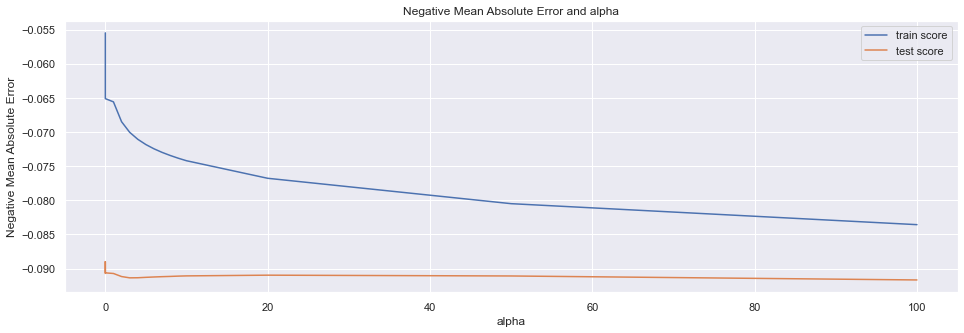

In [79]:
# plotting mean test and train scroes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**Actual best parameter given by the model is 0.1 but went by trial and error method to get the best parameters,went till 0.6 and after this value the r2 scores are not changing well, hence stopped it there.**


In [80]:
#final ridge model
alpha = 0.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.09576217e-02,  2.31532676e-02,  6.37054790e-02,  3.66193296e-02,
        4.08398710e-02,  2.14386837e-02, -1.55915238e-03,  1.15640557e-02,
        6.97967080e-03,  4.98988751e-03,  1.91833618e-02,  4.34015416e-02,
        4.52613870e-02,  1.22277611e-03,  6.96131760e-02,  2.07539407e-02,
        1.23020583e-03,  1.14971985e-02,  5.31255623e-03,  1.17098167e-02,
       -1.34330134e-02,  7.83602796e-03, -3.56559197e-03, -5.70577404e-03,
        3.09514887e-02,  9.08770898e-03,  1.11430881e-02,  2.16707068e-03,
        8.28108220e-03,  6.34948120e-03,  9.22259919e-03, -2.51962147e-03,
        1.51873554e-03, -7.23147219e-05, -3.82029725e-03,  2.61873166e-01,
        2.64344086e-01,  2.78697830e-01,  2.46013568e-01,  7.26777024e-02,
        1.32478087e-02,  3.64529763e-02,  1.76948566e-02, -5.52536231e-02,
        7.36852394e-03,  4.59681326e-02,  4.67713741e-02,  5.55185708e-02,
       -8.27015171e-02,  3.62936914e-02, -5.01526528e-02, -2.92850063e-02,
       -1.07457995e-02,  

In [81]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print("train score for Ridge regression",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# Prediction on test set
y_test_pred = ridge.predict(X_test)
print("Test score for Ridge regression",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# Printing the RMSE value
print(mean_squared_error(y_test, y_test_pred))

train score for Ridge regression 0.9482917065149058
Test score for Ridge regression 0.8423517325209512
0.0259394643014416


**The R2 scores of train and test data for ridge regression are as following "0.9482917065149058" and "0.8423517325209512", though the differences are more than the permissible range,it is not quite over fitting**

**To get the coefficients in the form of a dataframe:** 

In [82]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [83]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0              MSSubClass  11.053643
38            MSZoning_RL   0.278698
37            MSZoning_RH   0.264344
36            MSZoning_FV   0.261873
39            MSZoning_RM   0.246014
117      RoofMatl_WdShngl   0.221891
249        SaleType_ConLD   0.196025
90        Condition2_PosA   0.181873
111      RoofMatl_CompShg   0.159732
61   Neighborhood_Crawfor   0.153384

**The above are the top 10 features selected by the ridge regression model**

### Lasso Regression
#### Using GridSearchCV cross-valiation to find optimum value of alpha

In [84]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)
cv_results_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.074863      0.019005         0.004984        0.001668     0.00005   
1       0.078924      0.041174         0.004081        0.000801      0.0001   
2       0.030505      0.004972         0.005031        0.001309       0.001   
3       0.015843      0.001570         0.004506        0.001309       0.008   
4       0.015389      0.002552         0.004273        0.001537        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 5e-05}          -0.086067          -0.092902          -0.090970   
1  {'alpha': 0.0001}          -0.083273          -0.091988          -0.089490   
2   {'alpha': 0.001}          -0.084375          -0.095386          -0.093554   
3   {'alpha': 0.008}          -0.096361          -0.106809          -0.106661   
4    {'alpha': 0.01}          -0.097020          -0.107439          -0.107625   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.081635          -0.077725        -0.085860        0.005653   
1          -0.078916          -0.074246        -0.083582        0.006551   
2          -0.077778          -0.082942        -0.086807        0.006656   
3          -0.094208          -0.097991        -0.100406        0.005305   
4          -0.095811          -0.100133        -0.101606        0.005041   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.057139           -0.057166   
1                1           -0.059318           -0.058741   
2                3           -0.077539           -0.071588   
3                4           -0.099524           -0.088780   
4                5           -0.101002           -0.089751   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.057767           -0.058439           -0.058330   
1           -0.059230           -0.060059           -0.060442   
2           -0.072113           -0.077327           -0.077497   
3           -0.094671           -0.099751           -0.100097   
4           -0.096212           -0.101444           -0.102076   

   mean_train_score  std_train_score  
0         -0.057768         0.000552  
1         -0.059558         0.000611  
2         -0.075213         0.002751  
3         -0.096564         0.004372  
4         -0.098097         0.004662

In [86]:
#Best parameters using lasso:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08358244260203151


In [87]:
#final lasso model
alpha = 0.0012

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print("r2_score on train data for lasso:",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print("r2_score on test data for Lasso:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print("mean squared error:", mean_squared_error(y_test, y_test_pred))

r2_score on train data for lasso: 0.9065827275850737
r2_score on test data for Lasso: 0.8702887135691463
mean squared error: 0.021342710184330767


**After fine tuning the alpha values by a little margin,the Lasso regression model is doing pretty good with the data , the train scores and test scores are almost near and looks like generalizing the model efficiently**

In [88]:
lasso.coef_

array([-1.82019191e-02,  1.51248848e-02,  9.34770989e-02,  4.50676250e-02,
        5.24837861e-02,  2.20280453e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.34462735e-02,  1.24894334e-03,
        0.00000000e+00, -1.23062173e-03,  1.11414219e-01,  3.19295387e-02,
        2.29541828e-03,  1.43801746e-02,  9.55859533e-03,  6.20982176e-03,
       -1.05577744e-02,  1.43929131e-02,  8.57873342e-03, -0.00000000e+00,
        4.23680304e-02,  4.04220269e-03,  1.29143877e-02, -9.42304823e-04,
        6.44417380e-03,  5.62211052e-03,  1.11021159e-02, -1.66160025e-02,
       -1.00232400e-03, -1.35129975e-03, -6.49838173e-03,  0.00000000e+00,
        0.00000000e+00,  4.94799732e-02, -5.41225117e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.93336267e-03,
       -0.00000000e+00,  2.87242740e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

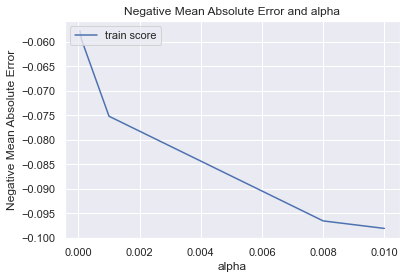

In [89]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [90]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']

In [91]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0              MSSubClass  11.839185
15           BsmtFullBath   0.111414
61   Neighborhood_Crawfor   0.099636
76   Neighborhood_Somerst   0.093699
3             OverallCond   0.093477
71   Neighborhood_NridgHt   0.078829
81        Condition1_Norm   0.057439
5            YearRemodAdd   0.052484
38            MSZoning_RL   0.049480
120   Exterior1st_BrkFace   0.049403

**The above are the top 10 features selected by the Lasso regression model**

**Best alpha value for Ridge : {'alpha': 0.6}**

**Best alpha value for Lasso : {'alpha': 0.0012}**

- Residual Analysis of the data

We will now validate the assumptions of linear regression

Text(0.5, 0, 'Errors')

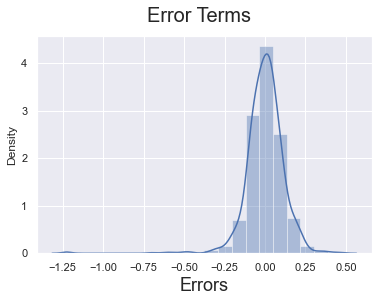

In [92]:
# Plot the histogram of the error terms on train data:
fig = plt.figure()
res=y_train - y_train_pred
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Observation**

Above histogram shows a normal distribution of error terms, hence proving the this assumption of linear regression.

In [93]:
# Plot the histogram of the error terms of test data as a residual analysis.
fig = plt.figure()
sns.distplot((y_test - y_test_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

**Observation**

Above histogram shows a normal distribution of error terms, hence proving the this assumption of linear regression.

##### Evaluation  using plot of prediction versus predicted sale price (using Lasso)

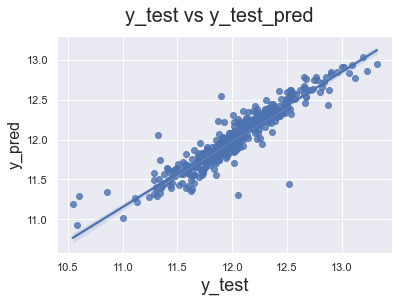

In [94]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=(y_test),y=y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()
    

## Observations:
- We can see that Lasso model is more better as the r2 scores are very near to each other which means the model is generalizing very good on unseen test data as well.
- The most important features in the model are MSSubClass- Depending on teh type of the building.
BsmtFullBath,
Neighborhood_Crawfor- Depending on the nearby companies,where crawfor is a big company, prices tend to increase as many employees would prefer houses near their houses.
,Neighborhood_Somerst-same as above, depending on the company,
OverallCond-Depending on the overall condition of the house. etc.
,Neighborhood_NridgHt,Condition1_Norm,YearRemodAdd,
MSZoning_RL



##  Subjective questions 1:

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [95]:
ridge = Ridge(alpha = 1.2)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print("r2_score on train data using Ridge regression:",r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print("r2_score on train data using Ridge regression:",r2_score(y_test,y_pred_test))

r2_score on train data using Ridge regression: 0.9418267618997298
r2_score on train data using Ridge regression: 0.8646246226630604


In [96]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0              MSSubClass  11.053643
38            MSZoning_RL   0.278698
37            MSZoning_RH   0.264344
36            MSZoning_FV   0.261873
39            MSZoning_RM   0.246014
117      RoofMatl_WdShngl   0.221891
249        SaleType_ConLD   0.196025
90        Condition2_PosA   0.181873
111      RoofMatl_CompShg   0.159732
61   Neighborhood_Crawfor   0.153384

**If we increase the Alphavalue by double, the test score have increased by 0.02 i.e. with aplha = 0.6 the test score is 0.84 whereas with alpha=1.2, the test score is 0.86** **and the most important predictor variables after the change is implemented is as mentioned above**

In [97]:
lasso = Lasso(alpha=0.0024)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("r2_score on train data using Lasso regression:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("r2_score on test data using Lasso regression::",r2_score(y_true=y_test,y_pred=y_test_pred))

r2_score on train data using Lasso regression: 0.8873051908321303
r2_score on test data using Lasso regression:: 0.8738075199509353


In [98]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature       Coef
0              MSSubClass  11.839185
15           BsmtFullBath   0.111414
61   Neighborhood_Crawfor   0.099636
76   Neighborhood_Somerst   0.093699
3             OverallCond   0.093477
71   Neighborhood_NridgHt   0.078829
81        Condition1_Norm   0.057439
5            YearRemodAdd   0.052484
38            MSZoning_RL   0.049480
120   Exterior1st_BrkFace   0.049403

**If we increase the Alphavalue by double, the test score have increased by 0.02 i.e. with aplha = 0.0012 the test score is 0.84 whereas with alpha=0.0024, the test score is 0.86** **and the most important predictor variables after the change is implemented is as mentioned above**

## Question 3:

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [99]:
Lasso_sort=lasso_coef.sort_values(by='Coef',ascending=False).head(5)
Lasso_sort

Feature       Coef
0             MSSubClass  11.839185
15          BsmtFullBath   0.111414
61  Neighborhood_Crawfor   0.099636
76  Neighborhood_Somerst   0.093699
3            OverallCond   0.093477

In [100]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

In [101]:
# we will drop the top five features

X_train = X_train.drop(Lasso_sort.Feature, axis=1)

In [102]:
# list of alphas to tune - 
# first we will tune aplha following approximately logarithimc scale

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500, 1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


model_cv.fit(X_train, y_train) 

print(model_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'alpha': 0.0001}


In [103]:
#final lasso model
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#Predict the R-squared value for Train data


Lasso(alpha=0.0001)

In [104]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [105]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0               LotArea  11.428473
33          MSZoning_RH   0.354390
35          MSZoning_RM   0.351430
34          MSZoning_RL   0.337598
36          Street_Pave   0.314373
244      SaleType_ConLI   0.175740
204      FireplaceQu_Fa   0.112920
115  Exterior1st_CBlock   0.099121
11         LowQualFinSF   0.080601
10             2ndFlrSF   0.077684